## Intro

In [1]:
import pandas as pd

In [7]:
# three data strutures:
# 1. Series (3. Index: Similar to a Series, but for naming, 
#               selecting, and transforming data within 
#               a Series or DataFrame)

a = ['a', 'b', 'c']
series = pd.Series(a, index=["t", "xY", "7"])
series

# or from dict
# series = pd.Series({"a": 4, "b": 5, "c": 6})
# series

a    4
b    5
c    6
dtype: int64

In [9]:
# 2. DataFrame
#  A DataFrame is essentially a dictionary of Series objects. 
#  In a DataFrame, the keys map to Series objects which share a common index

rock_bands = ["Pink Floyd", "Rush", "Yes"]
year_formed = [1965, 1968, 1968]
location_formed = ["London, England", "Ontario, Canada", "London, England"]


df = pd.DataFrame({"year_formed": year_formed, "location_formed": location_formed}, index=rock_bands)
df

,year_formed,location_formed
Pink Floyd,1965,"London, England"
Rush,1968,"Ontario, Canada"
Yes,1968,"London, England"


In [11]:
df = pd.read_csv("states.csv")
df.head(5)

,State,Population (2016),Population (2017)
0,Alabama,4860545,4874747
1,Alaska,741522,739795
2,Arizona,6908642,7016270
3,Arkansas,2988231,3004279
4,California,39296476,39536653


In [12]:
df.describe()

,Population (2016),Population (2017)
count,5.200000e+01,5.200000e+01
mean,6.284855e+06,6.328007e+06
std,7.197166e+06,7.257007e+06
min,5.849100e+05,5.793150e+05
25%,1.791484e+06,1.791128e+06
50%,4.261051e+06,4.298482e+06
75%,7.001715e+06,7.113638e+06
max,3.929648e+07,3.953665e+07


In [15]:
df = pd.read_csv("./example.csv", header=None, delimiter='|', names=["First", "Second"])
df

,First,Second
0,1,2
1,3,4
2,5,6
3,7,8


## More

#### Access and Types

In [17]:
df = pd.DataataFrame({"a": [0, 1, 2], "b": [0.0, 1.0, 2.0], "c": ["pandas", "is", "great"]})
df

,a,b,c
0,0,0.0,pandas
1,1,1.0,is
2,2,2.0,great


In [18]:
df['b']

0    0.0
1    1.0
2    2.0
Name: b, dtype: float64

In [19]:
df.b

0    0.0
1    1.0
2    2.0
Name: b, dtype: float64

#### Slicing

In [20]:
example = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
example

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [33]:
example[0:2]

,a,b,c
0,1,4,7
1,2,5,8


In [34]:
example[::2]

,a,b,c
0,1,4,7
2,3,6,9


#### Both

In [35]:
# only row 1, columns 'a' and 'c'
example.loc[1:1, ["a", "c"]]

,a,c
1,2,8


In [36]:
# all rows, columns 'a' to 'b'
example.loc[:, "a":"b"]

,a,b
0,1,4
1,2,5
2,3,6


In [37]:
example = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
example[::2]


,a,b,c
0,1,4,7
2,3,6,9


In [40]:
example[["b","c"]]

,b,c
0,4,7
1,5,8
2,6,9


In [46]:
example.iloc[[-1]]

,a,b,c
2,3,6,9


In [48]:
example2 = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]}, index=["A", "B", "C"])
example2

,a,b,c
A,1,4,7
B,2,5,8
C,3,6,9


In [51]:
example2.loc["B":"C", "a":"c"]

,a,b,c
B,2,5,8
C,3,6,9


In [52]:
example2.loc["B":"C", ["a","c"]]

,a,c
B,2,8
C,3,9


In [53]:
example2.iloc[[1, 2], [0, 1]]

,a,b
B,2,5
C,3,6


## Stats

In [54]:
states = pd.read_csv("states.csv", index_col=0)
states.head()

,Population (2016),Population (2017)
State,,
Alabama,4860545,4874747
Alaska,741522,739795
Arizona,6908642,7016270
Arkansas,2988231,3004279
California,39296476,39536653


In [55]:
states.describe()

,Population (2016),Population (2017)
count,5.200000e+01,5.200000e+01
mean,6.284855e+06,6.328007e+06
std,7.197166e+06,7.257007e+06
min,5.849100e+05,5.793150e+05
25%,1.791484e+06,1.791128e+06
50%,4.261051e+06,4.298482e+06
75%,7.001715e+06,7.113638e+06
max,3.929648e+07,3.953665e+07


In [59]:
print(states["Population (2016)"].min())
print(states["Population (2017)"].max())

584910
39536653


#### add new columns

In [62]:
states["Average Population"] = (states["Population (2016)"] + states["Population (2017)"]) / 2
states["Average Population"].head()

State
Alabama        4867646.0
Alaska          740658.5
Arizona        6962456.0
Arkansas       2996255.0
California    39416564.5
Name: Average Population, dtype: float64

In [64]:
states.head()

,Population (2016),Population (2017),Average Population
State,,,
Alabama,4860545,4874747,4867646.0
Alaska,741522,739795,740658.5
Arizona,6908642,7016270,6962456.0
Arkansas,2988231,3004279,2996255.0
California,39296476,39536653,39416564.5


## Viz

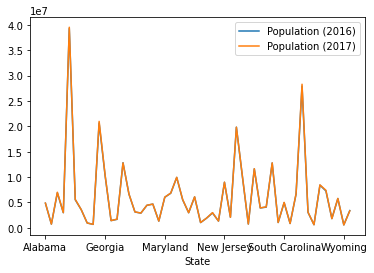

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

# notice how the index is specified
states = pd.read_csv("states.csv", index_col=0)
states.plot()

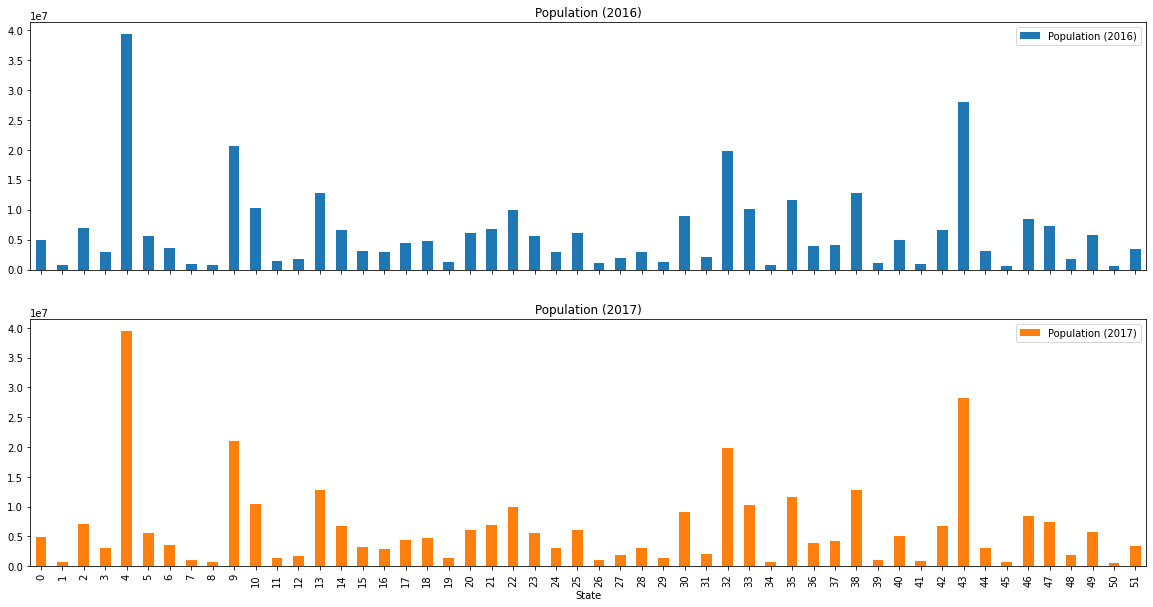

In [78]:
ax = states.plot(subplots=True, 
                 xticks=range(states.shape[0]), 
                 figsize=(20, 10),
                 kind='bar')

In [80]:
def set_of_chars(s):
    return set(list(s.lower()))
  

# don't use the names of states an the index!
states = pd.read_csv("states.csv")
  
series_of_sets = states.State.apply(lambda s: set_of_chars(s))
series_of_sets

0                                   {b, a, l, m}
1                                   {k, s, a, l}
2                             {n, o, i, r, z, a}
3                                {k, n, r, s, a}
4                       {f, l, n, c, o, i, r, a}
5                             {l, c, o, r, a, d}
6                          {u, c, t, o, n, e, i}
7                             {l, r, e, a, d, w}
8     {f, l, u, b, a, c,  , t, o, m, r, s, i, d}
9                          {f, l, a, o, r, i, d}
10                            {g, a, o, r, e, i}
11                                  {h, a, w, i}
12                               {h, a, o, i, d}
13                               {l, o, n, s, i}
14                                  {i, d, a, n}
15                                  {i, o, w, a}
16                                  {k, a, s, n}
17                         {k, u, y, c, t, n, e}
18                         {l, u, a, o, n, s, i}
19                               {i, m, n, e, a}
20                  